In [1]:
import mediapy as media
import numpy as np
import requests
import trimesh

from trlc_sdk.http.client import HTTPClient

### Files
You need to provide the following files:

In [2]:
rgb_path = './../data/scene/rgb.png'
depth_path = './../data/scene/depth.png'
mask_path = './../data/scene/mask.png'

cam_K_path = './../data/scene/cam_K.txt'

mesh_obj_path = './../data/mesh/brick.obj'
mesh_mtl_path = './../data/mesh/brick.obj.mtl'
mesh_texture_path = './../data/mesh/texture.png'


rgb,depth,mask

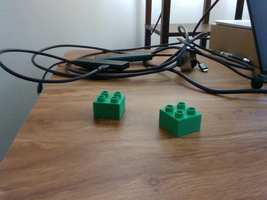
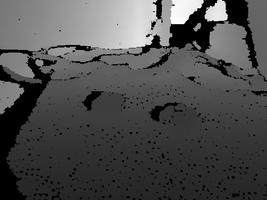
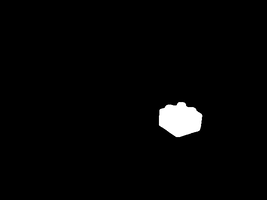

In [3]:
scene = {
    'rgb': media.read_image(rgb_path),
    'depth': media.read_image(depth_path),
    'mask': media.read_image(mask_path)
}
media.show_images(scene, height=200)

### Using the Pose Estimation API

In [4]:
files = {
    'mesh_obj': open(mesh_obj_path, 'rb'),
    'mesh_mtl': open(mesh_mtl_path, 'rb'),
    'mesh_texture': open(mesh_texture_path, 'rb'),
    'rgb': open(rgb_path, 'rb'),
    'depth': open(depth_path, 'rb'),
    'mask': open(mask_path, 'rb'),
}
data = {
    'cam_K': str(np.loadtxt(cam_K_path).reshape(3,3).tolist())
}

client = HTTPClient()
pose = client.run_pose_estimation(files, data)

### Visualize the result

In [5]:
mesh = trimesh.load(mesh_obj_path)
to_origin, extents = trimesh.bounds.oriented_bounds(mesh) # make sure SciPy is installed. Otherwise use this will fail.
bbox = np.stack([-extents/2, extents/2], axis=0).reshape(2,3)

center_pose = pose@np.linalg.inv(to_origin)

posed_3d_box,xyz_axis

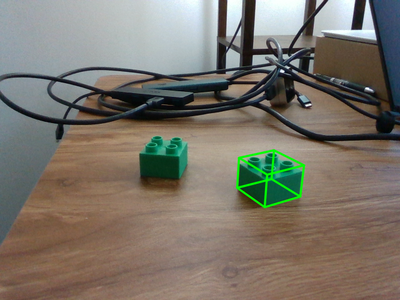
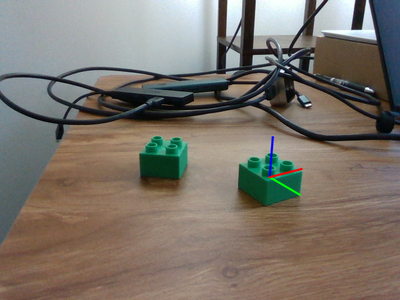

In [6]:
from trlc_sdk.utils import draw_posed_3d_box, draw_xyz_axis

visualization = {
    "posed_3d_box": draw_posed_3d_box(
        K=np.loadtxt(cam_K_path).reshape(3,3), 
        img=media.read_image(rgb_path), 
        ob_in_cam=center_pose, 
        bbox=bbox, 
        line_color=(0,255,0), 
        linewidth=2
    ),
    "xyz_axis": draw_xyz_axis(
        color=media.read_image(rgb_path), 
        ob_in_cam=center_pose, 
        K=np.loadtxt(cam_K_path).reshape(3,3), 
        thickness=2,
        scale=0.03
    )
}
media.show_images(visualization, height=300)